## Projeto 2 - Ciência dos dados

## Integrantes: 

- Luca Guazzelli 

- Pedro Henrique Vidal 

- Rafael Agnelo

## Objetivo: 

- A base de dados é uma base de microdados do ENEM em relação a dados do ENEM por escolas (públicas e privadas) no Brasil. Em relação à isso, faz-se a seguinte pergunta temática:

- A partir de uma série de features (Localidade, Taxa de abandono, Porte da escola , Média das notas em matemática, Tipo da dependência administrativa, Número de participantes do enem que cumprem os requisitos de participação e INSE), qual é a nota média de uma escola que performa mal, isto é, de forma insatisfatória em Matemática no ENEM (Média inferior à 500) no ano de 2015?



## Importando Bibliotecas

In [506]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


## Carregando base de dados
Por meio da base de dados do INEP, é possível acessar as planilhas de microdados relativas a informações de ENEM por escolas - com mais de 10 participantes - no Brasil.

In [507]:
dados = pd.read_csv('microdados_enem_por_escola\DADOS\MICRODADOS_ENEM_ESCOLA.csv',encoding='latin1', sep=";")

C:\Users\Pedro Vidal\AppData\Local\Temp\ipykernel_70024\2310550405.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('microdados_enem_por_escola\DADOS\MICRODADOS_ENEM_ESCOLA.csv',encoding='latin1', sep=";")


In [508]:
dados.head(5)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


## Análise exploratória e mineração de dados

De prima, cabe analisar descritivamente os features a fim de entender o comportamento da target nota média. Para tanto, urge:
- 1) Filtrar as colunas das bases de dados que são potencialmente necessárias para traçar um perfil adequado e eficaz.
- 2) Minerar os dados e possibilitar uma análise descritiva detalhada das variáveis, de modo a associar diferentes features graficamente e utilizar ferramentas estatísticas a fim de permitir a análise dos dados.


In [509]:
dados_limpando = dados.loc[dados["NU_ANO"] == 2015,("TP_DEPENDENCIA_ADM_ESCOLA", "TP_LOCALIZACAO_ESCOLA", "NU_TAXA_ABANDONO", "PORTE_ESCOLA", "NU_MEDIA_MT", "INSE")]

dados_limpando

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_ABANDONO,PORTE_ESCOLA,NU_MEDIA_MT,INSE
67619,4,1,0.0,Maior que 90 alunos,627.66,Grupo 6
67628,4,1,0.0,De 1 a 30 alunos,459.72,Grupo 4
67640,4,1,0.0,De 31 a 60 alunos,507.22,Grupo 5
67642,4,1,0.8,De 31 a 60 alunos,529.87,Grupo 5
67648,4,1,2.4,De 1 a 30 alunos,528.93,Grupo 5
...,...,...,...,...,...,...
172288,4,1,0.0,De 61 a 90 alunos,786.28,Grupo 6
172292,2,1,0.0,De 61 a 90 alunos,452.82,Grupo 3
172296,2,1,12.0,Maior que 90 alunos,456.23,Grupo 3
172302,2,1,11.0,Maior que 90 alunos,428.90,Grupo 3


1) "TP_DEPENDENCIA_ADM_ESCOLA" (Tipo da dependência administrativa da escola):
    Tipo: Feature qualitativa.
    Descrição: Indica o tipo de dependência administrativa da escola, classificando-a como Federal, Estadual, Municipal ou Privada.

2) "TP_LOCALIZACAO_ESCOLA" (Localização da escola):
    Tipo: Feature qualitativa.
    Descrição: Indica a localização da escola, sendo classificada como Urbana ou Rural.

3) NU_TAXA_ABANDONO" (Taxa de abandono):
    Tipo: Feature qualitativa.
    Descrição: Representa a taxa de abandono escolar, indicando a proporção de alunos que abandonaram a escola.

4) "PORTE_ESCOLA" (Porte da escola):
    Tipo: Feature qualitativa.
    Descrição: Indica o porte da escola, categorizando-a como Pequena, Média, Grande ou Não se aplica.

5)  "INSE" (Índice de Nível Socioeconômico):
    Tipo: Feature qualitativa.
    Descrição: O INSE é um índice que mede o nível socioeconômico das famílias dos alunos da escola. É categorizado em grupos, sendo numerados de 1 a 6, representando diferentes níveis socioeconômicos, onde o Grupo 1 representa o nível mais baixo e o Grupo 6 o mais alto.

6) "NU_MEDIA_MT" (Média das notas em Matemática no ENEM):
    Tipo: Target qualitativa.
    Descrição: Representa a média das notas obtidas pelos alunos da escola na disciplina de Matemática no Exame Nacional do Ensino Médio (ENEM).

## Analise Descritiva da Target

Agora, pode-se analisar a target (Média de Matemática) perante todas as features e entender acerca das influências de cada uma.


O Brasil é um país que desde muito tempo tem desafasagens com relação ao sistma educacional. Durante as décadas de 1990 a 200, o desempenho médio dos alunos em matemática no ENEM era geralmente baixo. O país enfrentava desafios educacionais significativos, como baixo investimento na educação, problemas estruturais nas escolas e falta de formação adequada de professores. Esses fatores contribuíram para resultados insatisfatórios nas médias de matemática.

A partir dos anos 2000, houve um aumento de atenção e investimentos na educação. Políticas e programas foram implementados para melhorar a qualidade do ensino, formação de professores e infraestrutura escolar. Essas ações começaram a ter impacto positivo nos resultados das médias de matemática no ENEM. O desempenho dos alunos começou a melhorar gradualmente, por mais mais baixas que as notas ainda fossem.

Nos últimos anos, observamos uma tendência geral de melhoria nos resultados de matemática no ENEM. Esforços contínuos foram feitos para aprimorar a educação, com ênfase na capacitação dos professores, revisão de currículos e investimentos em tecnologia educacional. Isso contribuiu para um aumento progressivo nas médias de matemática em muitas escolas do Brasil.

É importante destacar que as médias de matemática no ENEM variam entre diferentes regiões do país e entre escolas públicas e privadas. Desigualdades socioeconômicas, acesso desigual à educação e outros fatores socioeconômicos podem influenciar esses resultados.

Por isso, de acordo com a base de dados e suas respectivas informações filtradas e devidamente priorizadas, entende-se que as mesmas são significativas para a descrição condizente à média de matemática no ENEM das escolas.

## Importando mais uma biblioteca

Cabe, assim, analisar graficamente cada feature em relação à nossa target, que é a média de matemática. Primeiramente, importa-se a biblioteca seaborn:

In [510]:
import seaborn as sns

O Seaborn é uma biblioteca de visualização de dados em Python que trabalha em conjunto com o Matplotlib. Ele oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos. A importação do Seaborn é realizada com o objetivo de aproveitar suas funcionalidades adicionais em relação ao Matplotlib, especialmente no que diz respeito à criação de gráficos estatísticos mais complexos e esteticamente agradáveis.

Com essa biblioteca, é possível otimizar os gráficos BoxPlot que serão criados. O boxplot, ou diagrama de caixa, é um gráfico que permite visualizar a distribuição de uma variável quantitativa em relação a uma variável categórica. Ele é composto por um retângulo que representa o intervalo interquartil (25% a 75% dos dados), uma linha que indica a mediana, além de "bigodes" que representam a amplitude dos dados. O boxplot é uma ferramenta útil para identificar a dispersão e possíveis outliers nos dados, além de permitir a comparação entre diferentes grupos ou categorias.

Também, pensando nas variáveis quantitativas, o scatter plot, ou gráfico de dispersão, é uma representação gráfica que permite observar a relação entre duas variáveis quantitativas. Cada ponto no gráfico representa uma observação, sendo posicionado de acordo com os valores das duas variáveis. Essa visualização nos permite identificar padrões, tendências ou correlações entre as variáveis. O scatter plot é especialmente útil para investigar a relação de causa e efeito entre variáveis ou para identificar possíveis associações entre elas.

Através dessas ferramentas gráficas, é possível explorar e analisar as relações entre as variáveis do conjunto de dados, auxiliando na compreensão dos padrões e tendências presentes. Combinar a visualização gráfica com medidas de resumo e/ou medidas de associação fornece uma análise mais completa e interpretação dos dados, permitindo obter insights valiosos para a tomada de decisões informada

A partir disso, pode-se dar início a construção dos gráficos entre variáveis qualitativas e quantitativas:


1) Gráfico de densidade das notas médias em matemática dos estudantes brasileiros no ENEM

Text(0, 0.5, 'Densidade')

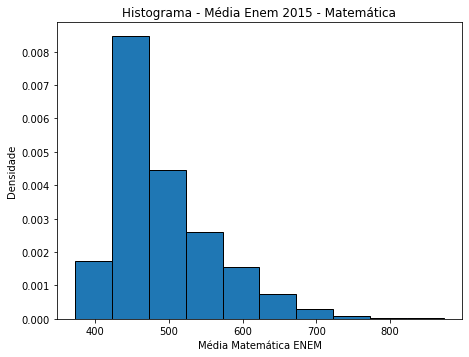

In [511]:
plt.figure(figsize=(16, 12))
plt.subplot(221)
plt.hist(dados_limpando.NU_MEDIA_MT, edgecolor='black', density=True)
plt.title("Histograma - Média Enem 2015 - Matemática")
plt.xlabel('Média Matemática ENEM')
plt.ylabel('Densidade')


De acordo com o gráfico, há uma elevada concentração na parte da esquerda, revelando uma assimetria, justificada com base na mediana ser inferior à média da amostra.

2) Dependência admnistrativa (feature qualitativa) X Média das notas em matemática (target quantitativa)

- O número 1 indica que a escola é Federal

- O número 2 indica que a escola é Estadual

- O número 3 indica que a escola é Municipal

- O número 4 indica que a escola é Privada

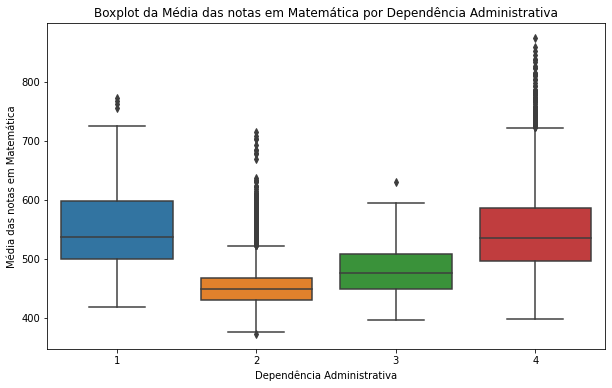

In [512]:

# Boxplot da Média das notas em Matemática segmentadas por Dependência Administrativa
cat_dep = dados_limpando['TP_DEPENDENCIA_ADM_ESCOLA'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(x= cat_dep, y='NU_MEDIA_MT', data=dados_limpando)
plt.xlabel('Dependência Administrativa')
plt.ylabel('Média das notas em Matemática')
plt.title('Boxplot da Média das notas em Matemática por Dependência Administrativa')
plt.show()


Pode se observar que os índices de escolas privadas e federeais apresentam maiores médias e relações entre os quartis se comparadas a escolas municipais e estaduais.

3) Localização da escola (feature qualitativa) X Média das notas em matemática (target quantitativa)

- O número 1 indica que a escola localiza-se em uma zona Urbana

- O número 2 indica que a escola localiza-se em uma zona Rural

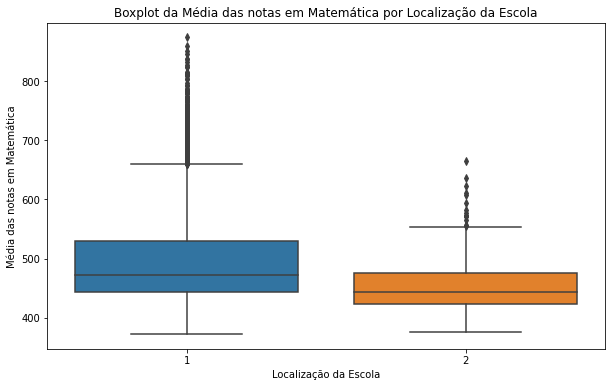

In [513]:
# Boxplot da Média das notas em Matemática segmentadas por Localização da Escola
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_LOCALIZACAO_ESCOLA', y='NU_MEDIA_MT', data=dados_limpando)
plt.xlabel('Localização da Escola')
plt.ylabel('Média das notas em Matemática')
plt.title('Boxplot da Média das notas em Matemática por Localização da Escola')
plt.show()

Pode se observar que os índices de Escolas em zonas Urbanas apresentam maiores médias e relações entre os quartis se comparadas a escolas em zonas Rurais.

4) Taxa de abandono (feature qualitativa) X Média das notas em matemática (target quantitativa)

- Esse indicador é expresso pela razão entre os abandonos (subtraídos os alunos que se matricularam, mas ao longo do ano letivo foram transferidos, ou faleceram, ou dos quais não se tem informação, somados os alunos admitidos) e a soma entre abandono, aprovação e reprovação, multiplicados por 100.

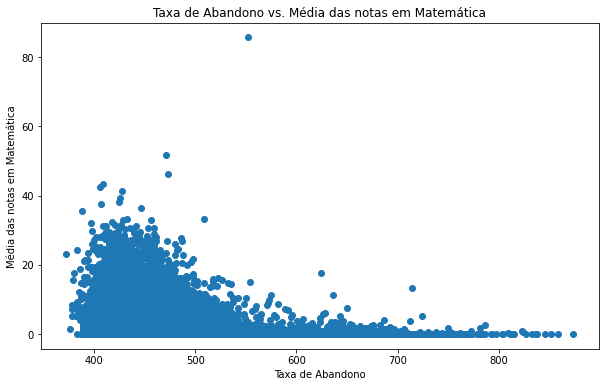

In [514]:
# Gráfico de Dispersão: Taxa de Abandono vs. Média das notas em Matemática
plt.figure(figsize=(10, 6))
plt.scatter(dados_limpando['NU_MEDIA_MT'], dados_limpando['NU_TAXA_ABANDONO'])
plt.xlabel('Taxa de Abandono')
plt.ylabel('Média das notas em Matemática')
plt.title('Taxa de Abandono vs. Média das notas em Matemática')
plt.show()

A associação entre as variáveis revela que quanto maior é  ataxa de abandono de uma determinada escola, menor é a sua média em matemática pelo ENEM.

5) Porte da escola (feature qualitativa) X Média das notas em matemática (target quantitativa)

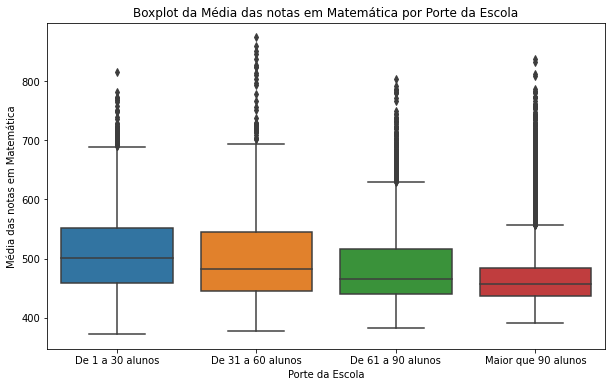

In [515]:
# Boxplot da Média das notas em Matemática segmentadas por Porte da Escola
cat_porte = dados_limpando['PORTE_ESCOLA'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(x= cat_porte, y='NU_MEDIA_MT', data=dados_limpando)
plt.xlabel('Porte da Escola')
plt.ylabel('Média das notas em Matemática')
plt.title('Boxplot da Média das notas em Matemática por Porte da Escola')
plt.show()

Pode se observar que os índices de escolas com menor apresentam maiores médias e relações entre os quartis se comparadas a escolas de maior porte. Todavua, as que assumem maior porte, por menor que seja a média em comparação às outras, possuem uma estabilidade maior dentro da sua mediana, visto que assumem um espaço amostral maior que as demais.

6) INSE (feature qualitativa) X Média das notas em matemática (target quantitativa)

Para tal indicador, foram criados seis grupos, de forma que o Grupo 1 congrega as escolas com Inse médio mais baixo e o Grupo 6, com mais alto.

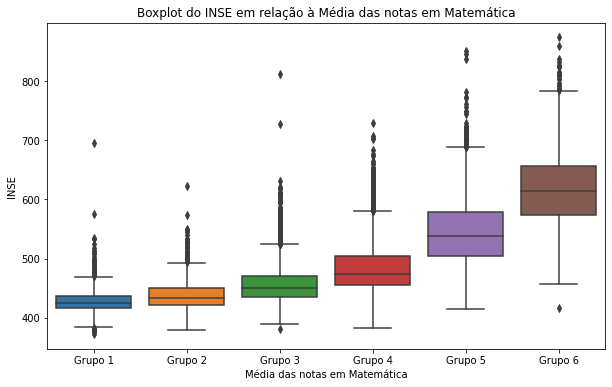

In [516]:
# Boxplot do INSE em relação à Média das notas em Matemática
cat_inse = dados_limpando['INSE'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(x= cat_inse, y='NU_MEDIA_MT', data=dados_limpando)
plt.xlabel('Média das notas em Matemática')
plt.ylabel('INSE')
plt.title('Boxplot do INSE em relação à Média das notas em Matemática')
plt.show()

A partir deste gráfico, conclui-se que quanto maior for o nível socioeconômico avaliado, seus mínimos e máximos consequentemente serão superiores aos demais grupos que estão em patamares socioeconômicos inferiores. 

7) Aplicação da função "associations" da biblioteca Dython

A importância dessa ferramenta está relacionada à compreensão das relações entre variáveis categóricas em um conjunto de dados. O teste do qui-quadrado é uma técnica estatística que permite determinar se existe uma associação significativa entre duas variáveis categóricas, indicando se essas variáveis são dependentes ou independentes uma da outra. A partir do gráfico de calor, é possível identificar padrões de associação entre variáveis, o que pode fornecer insights valiosos para a compreensão do comportamento dos dados relacionados às médias de matemática por escolas e auxiliar na tomada de decisões informadas.

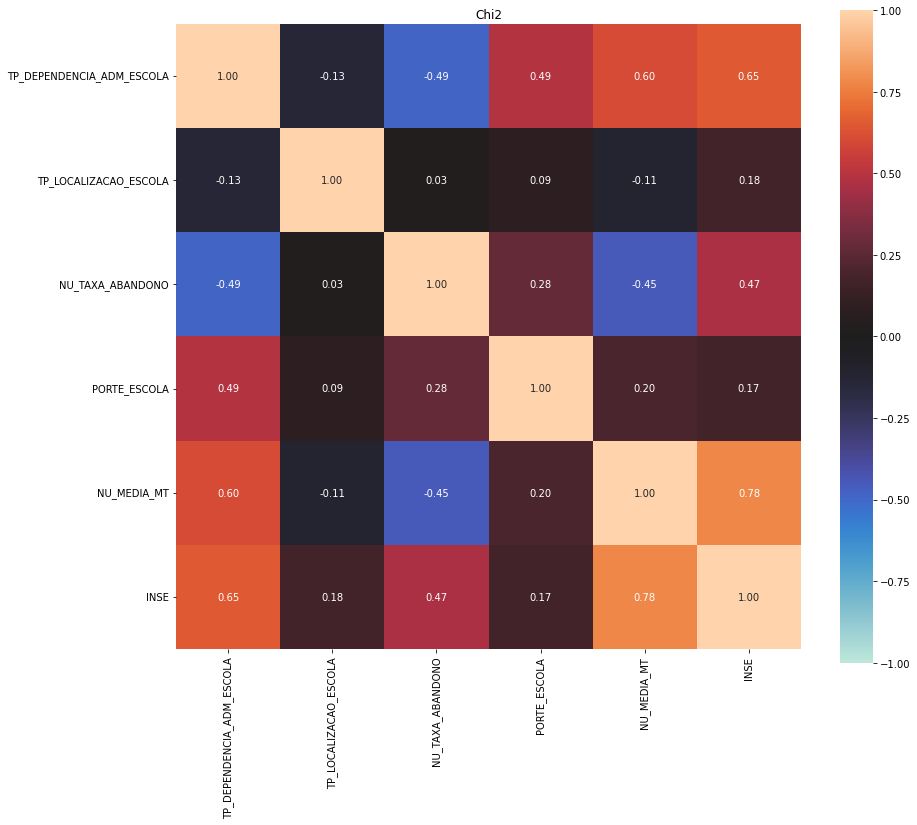

{'corr':                            TP_DEPENDENCIA_ADM_ESCOLA  TP_LOCALIZACAO_ESCOLA  \
 TP_DEPENDENCIA_ADM_ESCOLA                   1.000000              -0.133953   
 TP_LOCALIZACAO_ESCOLA                      -0.133953               1.000000   
 NU_TAXA_ABANDONO                           -0.491872               0.030753   
 PORTE_ESCOLA                                0.485912               0.086309   
 NU_MEDIA_MT                                 0.604000              -0.112197   
 INSE                                        0.652178               0.178834   
 
                            NU_TAXA_ABANDONO  PORTE_ESCOLA  NU_MEDIA_MT  \
 TP_DEPENDENCIA_ADM_ESCOLA         -0.491872      0.485912     0.604000   
 TP_LOCALIZACAO_ESCOLA              0.030753      0.086309    -0.112197   
 NU_TAXA_ABANDONO                   1.000000      0.277055    -0.452961   
 PORTE_ESCOLA                       0.277055      1.000000     0.201365   
 NU_MEDIA_MT                       -0.452961      0.201

In [517]:
from dython.nominal import associations
associations(dados_limpando, figsize=(14,12), title='Chi2')

## Modelos de predição


Para a realização do modelo de predição, serão utilizadas duas técnicas: a Regressão Linear e a Árvore de decisão.

## Regressão Linear

A regressão linear simples é um método estatístico amplamente utilizado para modelar a relação entre uma variável dependente e uma variável independente. 

O modelo de regressão linear assume uma relação linear entre as variáveis, o que significa que tenta encontrar a melhor linha reta que se ajusta aos dados disponíveis. Essa linha reta é determinada através da minimização dos erros entre os valores reais e os valores previstos pelo modelo.

O objetivo da regressão linear é encontrar os coeficientes ou pesos das variáveis independentes que minimizam a soma dos quadrados dos resíduos (erros). Esses coeficientes representam as contribuições relativas das variáveis independentes na previsão da variável dependente.

Uma vez que o modelo de regressão linear é treinado com os dados históricos, ele pode ser utilizado para fazer previsões em novos dados, onde as variáveis independentes são conhecidas. Ao aplicar as variáveis independentes ao modelo, ele calcula uma estimativa numérica para a variável dependente.

Neste caso, ela foi utilizada com o intuito de compreender as relações entre as variáveis,  fazer previsões, controlar variáveis de confusão, analisar a importância relativa dos fatores e interpretar os resultados de forma estatisticamente significativa. 

A regressão linear permite fazer previsões sobre a média de notas de matemática no ENEM com base nos valores das variáveis independentes. Isso pode ser útil para entender quais variáveis têm maior impacto nas notas dos alunos e como diferentes fatores estão relacionados.

Além disso, é possível controlar o efeito de outras variáveis ao analisar o impacto de uma variável específica. Isso ajuda a evitar conclusões equivocadas ou distorcidas ao considerar apenas uma variável isoladamente.

Os coeficientes de regressão fornecem informações sobre a direção e magnitude da relação entre as variáveis independentes e a variável dependente. Além disso, os testes estatísticos associados à regressão permitem avaliar a significância estatística dessas relações.

## Árvore de Decisão

O modelo de predição de árvore de decisão é um algoritmo de aprendizado de máquina que utiliza uma estrutura em forma de árvore para fazer previsões ou tomar decisões. É um método supervisionado, o que significa que requer dados rotulados para treinar o modelo.

A árvore de decisão é construída a partir de um conjunto de regras de decisão que dividem os dados com base nas características ou atributos disponíveis. Cada nó interno da árvore representa uma condição sobre uma característica específica, e cada ramo representa uma saída ou caminho a ser seguido. Os nós folha da árvore contêm as previsões ou resultados finais.

Durante o treinamento, o modelo de árvore de decisão busca encontrar as melhores divisões dos dados, com o objetivo de maximizar a pureza dos grupos resultantes ou reduzir a incerteza. Existem diferentes critérios de divisão, como ganho de informação, índice Gini ou erro quadrático médio, que são utilizados para avaliar a qualidade das divisões e escolher a melhor.

Uma vez que a árvore de decisão é construída, ela pode ser utilizada para fazer previsões ou classificar novos dados. Para isso, os dados de entrada são percorridos ao longo da árvore, seguindo as condições e ramificações até chegar a um nó folha, onde é feita a previsão ou decisão final.

As árvores são relativamente rápidas de treinar e prever, mesmo em conjuntos de dados maiores. Isso torna as árvores de decisão uma opção viável para análise exploratória rápida e modelagem preditiva em muitos contextos.

Além disso, têm uma boa tolerância a outliers e podem lidar com dados faltantes sem a necessidade de imputação. As divisões nas árvores são baseadas em critérios de impureza ou ganho de informação, o que torna o modelo menos sensível a valores extremos ou dados ausentes.

Tal método permite a interpretabilidade, tratamento adequado de variáveis qualitativas, detecção de interações complexas, robustez a outliers e dados faltantes, além de oferecer flexibilidade e bom desempenho. Essas características tornam as árvores de decisão uma ferramenta valiosa para analisar e prever os resultados do estudo.






In [518]:
dados_dummies = pd.get_dummies(dados_limpando, columns=["TP_DEPENDENCIA_ADM_ESCOLA", "TP_LOCALIZACAO_ESCOLA", "PORTE_ESCOLA", "INSE"])

In [519]:
dados_dummies

,NU_TAXA_ABANDONO,NU_MEDIA_MT,TP_DEPENDENCIA_ADM_ESCOLA_1,TP_DEPENDENCIA_ADM_ESCOLA_2,TP_DEPENDENCIA_ADM_ESCOLA_3,TP_DEPENDENCIA_ADM_ESCOLA_4,TP_LOCALIZACAO_ESCOLA_1,TP_LOCALIZACAO_ESCOLA_2,PORTE_ESCOLA_De 1 a 30 alunos,PORTE_ESCOLA_De 31 a 60 alunos,PORTE_ESCOLA_De 61 a 90 alunos,PORTE_ESCOLA_Maior que 90 alunos,INSE_Grupo 1,INSE_Grupo 2,INSE_Grupo 3,INSE_Grupo 4,INSE_Grupo 5,INSE_Grupo 6
67619,0.0,627.66,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
67628,0.0,459.72,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0
67640,0.0,507.22,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
67642,0.8,529.87,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
67648,2.4,528.93,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172288,0.0,786.28,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
172292,0.0,452.82,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
172296,12.0,456.23,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
172302,11.0,428.90,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [556]:
def fazer_previsao():
    # Obtendo as características da escola a partir de input
    dependencia = int(input("Informe o tipo de dependência administrativa da escola: "))
    localizacao = int(input("Informe o tipo de localização da escola: "))
    taxa_abandono = float(input("Informe a taxa de abandono da escola: "))
    porte = int(input("Informe o porte da escola: "))
    inse = int(input("Informe o grupo INSE da escola: "))
    
    # Criando um DataFrame com as características fornecidas
    features = pd.DataFrame([[dependencia, localizacao, taxa_abandono, porte, inse]],
                            columns=['TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA', 'INSE'])
    
    # Fazendo a previsão usando os modelos treinados
    linear_prediction = linear_model.predict(features)
    tree_prediction = tree_model.predict(features)
    
    # Retornandp as previsões
    return linear_prediction[0], tree_prediction[0]

# Utilizando a função para fazer previsões
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()

linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

linear_pred, tree_pred = fazer_previsao()

print('Previsão usando Regressão Linear:', linear_pred)
print('Previsão usando Árvore de Decisão:', tree_pred)



Previsão usando Regressão Linear: 373.71603319136506
Previsão usando Árvore de Decisão: 477.41


In [557]:
#De início, vamos alterar a base dados
dados_manipulados = dados_limpando
# Transformar a coluna "PORTE_ESCOLA"
dados_manipulados['PORTE_ESCOLA'] = dados_manipulados['PORTE_ESCOLA'].replace({
    'De 1 a 30 alunos': 1,
    'De 31 a 60 alunos': 2,
    'De 61 a 90 alunos': 3,
    'Maior que 90 alunos': 4
})

# Transformar a coluna "INSE"
dados_manipulados['INSE'] = dados_manipulados['INSE'].replace({
    'Grupo 1': 1,
    'Grupo 2': 2,
    'Grupo 3': 3,
    'Grupo 4': 4,
    'Grupo 5': 5,
    'Grupo 6': 6
})

dados_manipulados

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_ABANDONO,PORTE_ESCOLA,NU_MEDIA_MT,INSE
67619,4,1,0.0,4,627.66,6.0
67628,4,1,0.0,1,459.72,4.0
67640,4,1,0.0,2,507.22,5.0
67642,4,1,0.8,2,529.87,5.0
67648,4,1,2.4,1,528.93,5.0
...,...,...,...,...,...,...
172288,4,1,0.0,3,786.28,6.0
172292,2,1,0.0,3,452.82,3.0
172296,2,1,12.0,4,456.23,3.0
172302,2,1,11.0,4,428.90,3.0


In [558]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Preencher valores ausentes com a média
dados_manipulados.fillna(dados_manipulados.mean(), inplace=True)

# Selecionar as features e target
features = dados_manipulados[['TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA', 'INSE']]
target = dados_manipulados['NU_MEDIA_MT']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazendo previsões usando o modelo de regressão linear
predicao_linear = linear_model.predict(X_test)

# Criar o modelo de árvore de decisão
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [559]:
features 

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_ABANDONO,PORTE_ESCOLA,INSE
67619,4,1,0.0,4,6.0
67628,4,1,0.0,1,4.0
67640,4,1,0.0,2,5.0
67642,4,1,0.8,2,5.0
67648,4,1,2.4,1,5.0
...,...,...,...,...,...
172288,4,1,0.0,3,6.0
172292,2,1,0.0,3,3.0
172296,2,1,12.0,4,3.0
172302,2,1,11.0,4,3.0


## Avaliando a perfomance da predição


Utilizou-se dois métodos que avaliam os modelos de predição:

RMSE (Root Mean Square Error):
O RMSE mede a diferença média entre as previsões do modelo e os valores reais. Quanto menor o valor do RMSE, melhor o modelo está em termos de ajuste aos dados reais. Em outras palavras, o RMSE indica o quão próximo as previsões estão dos valores reais.

R2 (R-squared):
O R2 mede o quanto o modelo se ajusta aos dados em relação à variabilidade dos valores reais. Quanto maior o valor de R2, melhor o modelo está em termos de explicar a variabilidade dos dados. Em outras palavras, o R2 indica o quão bem o modelo consegue explicar os valores reais.



In [560]:
# Regressão Linear pelo train
linear_predictions_train = linear_model.predict(X_train)

#  treinamento com arvore de decisao
tree_predictions_train = tree_model.predict(X_train)

#  regressão linear em relação à base de teste
linear_predictions_test = linear_model.predict(X_test)

#  árvore de decisão em relação à base de teste
tree_predictions_test = tree_model.predict(X_test)

#  regressão linear na base de treinamento
linear_rmse_train = mean_squared_error(y_train, linear_predictions_train, squared=False)
linear_r2_train = r2_score(y_train, linear_predictions_train)

#  árvore de decisão na base de treinamento
tree_rmse_train = mean_squared_error(y_train, tree_predictions_train, squared=False)
tree_r2_train = r2_score(y_train, tree_predictions_train)

#  regressão linear na base de teste
linear_rmse_test = mean_squared_error(y_test, linear_predictions_test, squared=False)
linear_r2_test = r2_score(y_test, linear_predictions_test)

#  árvore de decisão na base de teste
tree_rmse_test = mean_squared_error(y_test, tree_predictions_test, squared=False)
tree_r2_test = r2_score(y_test, tree_predictions_test)

print("Regressão Linear (Treinamento):")
print("RMSE:", linear_rmse_train)
print("R2 Score:", linear_r2_train)
print()
print("Árvore de Decisão (Treinamento):")
print("RMSE:", tree_rmse_train)
print("R2 Score:", tree_r2_train)
print()
print("Regressão Linear (Teste):")
print("RMSE:", linear_rmse_test)
print("R2 Score:", linear_r2_test)
print()
print("Árvore de Decisão (Teste):")
print("RMSE:", tree_rmse_test)
print("R2 Score:", tree_r2_test)

Regressão Linear (Treinamento):
RMSE: 44.36184043409849
R2 Score: 0.5898701338178977

Árvore de Decisão (Treinamento):
RMSE: 34.994249373490476
R2 Score: 0.7447911971895227

Regressão Linear (Teste):
RMSE: 44.44624207673372
R2 Score: 0.574515432009657

Árvore de Decisão (Teste):
RMSE: 40.733937790434226
R2 Score: 0.6426230730026782


## Conclusão

Teoricamente, temos:

A partir das técnicas de predição, como regressão linear e árvore de decisão, é possível concluir que existem variáveis e características nas escolas que estão correlacionadas com o desempenho médio em matemática no ENEM. Dentre as conclusões obtidas, podemos destacar as seguintes tendências:

Primeiramente, as variáveis socioeconômicas exercem influência significativa no desempenho dos alunos. Escolas com perfil socioeconômico inferior tendem a apresentar médias em matemática mais baixas, indicando que o contexto socioeconômico dos estudantes pode impactar seu desempenho acadêmico.

Além disso, a localização das escolas também desempenha um papel importante. Escolas localizadas em áreas rurais têm médias em matemática inferiores em comparação com as escolas situadas em áreas urbanas. Isso sugere que as escolas rurais enfrentam desafios adicionais, como a falta de recursos educacionais e infraestrutura adequada.

O tipo de dependência administrativa também está relacionado ao desempenho em matemática. Escolas públicas ou municipais tendem a apresentar médias inferiores em relação a escolas privadas ou federais. Isso pode indicar diferenças na qualidade do ensino, recursos disponíveis e estrutura organizacional entre os diferentes tipos de escolas.

Por fim, o porte da escola e a taxa de abandono são fatores que influenciam o desempenho em matemática. Escolas de menor porte e com taxas de abandono elevadas tendem a ter médias em matemática mais baixas. Esses fatores podem estar relacionados a limitações de recursos, menor diversidade de cursos oferecidos e problemas de engajamento dos estudantes.

Essas conclusões destacam a importância de abordar as desigualdades socioeconômicas, melhorar o acesso a recursos educacionais, investir em infraestrutura e promover estratégias para reduzir a taxa de abandono escolar. Ao considerar esses aspectos, é possível direcionar esforços para melhorar o desempenho em matemática nas escolas, visando a igualdade de oportunidades e uma educação de qualidade para todos os alunos.

Quanto à perfomance:

As métricas de avaliação, como o RMSE e o R2 Score, são importantes para avaliar a qualidade dos modelos de predição e entender como eles se comportam em diferentes conjuntos de dados. É necessário considerar a interpretação dessas métricas em relação ao overfitting e underfitting.

Overfitting ocorre quando um modelo se ajusta excessivamente aos dados de treinamento, capturando os detalhes e ruídos específicos do conjunto de treinamento, mas não generalizando bem para novos dados. Nesse caso, é possível que o modelo apresente desempenho muito bom no conjunto de treinamento, mas desempenho ruim no conjunto de teste. Isso pode levar a um RMSE e R2 Score baixos no conjunto de teste, indicando que o modelo não generaliza bem.

Underfitting, por outro lado, ocorre quando um modelo é muito simples e não consegue capturar os padrões e complexidades dos dados. Isso resulta em um desempenho ruim tanto no conjunto de treinamento quanto no conjunto de teste, levando a valores de RMSE e R2 Score altos.

Ao analisar os resultados apresentados, é importante considerar se há indícios de overfitting ou underfitting nos modelos de predição. Se os valores de RMSE e R2 Score forem bastante diferentes entre o conjunto de treinamento e o conjunto de teste, pode ser um sinal de overfitting. Por outro lado, se os valores forem consistentes entre os conjuntos, isso indica um melhor ajuste do modelo.

No caso específico dos resultados apresentados (Regressão Linear e Árvore de Decisão), observa-se que os valores de RMSE e R2 Score não são muito discrepantes entre o conjunto de treinamento e o conjunto de teste. Isso sugere que os modelos não estão sofrendo de overfitting grave ou underfitting. No entanto, é importante notar que a Árvore de Decisão apresentou um desempenho melhor em ambas as métricas em relação à Regressão Linear.

Para uma análise mais completa e conclusões mais robustas, seria necessário examinar outros aspectos dos modelos, como a complexidade, a capacidade de generalização, a consistência em diferentes conjuntos de dados e a análise de resíduos. Essas análises mais aprofundadas ajudam a refinar o senso crítico e fornecer uma discussão mais precisa sobre as medidas calculadas e o desempenho dos modelos.

Quanto à comparação:

Comparando os modelos, podemos observar que a Árvore de Decisão apresentou um desempenho melhor em ambas as métricas (RMSE e R2 Score) tanto no conjunto de treinamento quanto no conjunto de teste, em comparação com a Regressão Linear. Isso indica que a Árvore de Decisão foi capaz de fazer previsões mais precisas e explicar uma maior porcentagem da variabilidade dos dados.

Portanto, com base nos resultados apresentados, podemos concluir que o modelo de Árvore de Decisão é melhor e mais preciso do que a Regressão Linear para esse conjunto de dados em particular. É importante ressaltar que essa conclusão é específica para os dados e métricas utilizadas, e outros conjuntos de dados podem ter resultados diferentes.

## Referências

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher#:~:text=O%20método%20get_dummies()%20é,forma%20direta%20das%20variáveis%20categóricas.&text=Esses%20dados%20podem%20ser%20passados,learning%20para%20realizar%20uma%20previsão.

https://statplace.com.br/blog/como-interpretar-um-boxplot/

https://pypi.org/project/dythonhttps://analisemacro.com.br/mercado-financeiro/regressoes-lineares-em-r-e-python-2/

https://www.hashtagtreinamentos.com/arvore-decisao-ciencia-dados

https://sol.sbc.org.br/livros/index.php/sbc/catalog/download/33/133/319-1?inline=1

https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

https://gist.github.com/sanguedemonstro/53071059def69958a97098c41e2e0e51

https://medium.com/data-hackers/implementando-regressão-linear-simples-em-python-91df53b920a8

https://medium.com/@lamartine_sl/regressão-linear-com-sklearn-modelo-de-previsão-de-custos-com-plano-de-saúde-5e963e590f4c

https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f

https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

https://didatica.tech/a-biblioteca-scikit-learn-pyhton-para-machine-learning/#:~:text=O%20scikit%2Dlearn%20é%20uma,aplicação%20prática%20de%20machine%20learning.

https://blog.somostera.com/data-science/arvores-de-decisao

http://carlosbaia.com/2016/12/24/decision-tree-e-random-forest/